In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#save the urls of each of the games data tables
urlSid = "https://steamcharts.com/app/289070"
urlHum = "https://steamcharts.com/app/1124300"
urlEur = "https://steamcharts.com/app/236850"

#access the urls
SidResponse = requests.get(urlSid)
HumResponse = requests.get(urlHum)
EurResponse = requests.get(urlEur)

#Extract the html data, and use beautifulsoup to parse it
Sid_html = SidResponse.text
Sid_soup = BeautifulSoup(Sid_html, 'html.parser')

Hum_html = HumResponse.text
Hum_soup = BeautifulSoup(Hum_html, 'html.parser')

Eur_html = EurResponse.text
Eur_soup = BeautifulSoup(Eur_html, 'html.parser')


In [ ]:
#pull out the table for the civilization 6 data
Sid_table = Sid_soup.find('table')
table_data = []
if Sid_table:
    for row in Sid_table.find_all('tr'):
        row_data = []
        for cell in row.find_all(['th', 'td']):
            row_data.append(cell.get_text(strip=True))
        table_data.append(row_data)

#convert this table into a dataframe
Sid_df = pd.DataFrame(table_data[1:], columns=table_data[0])
#drop the first, unneccessary line
Sid_df = Sid_df.drop(0,axis = 0)
#create a column to identify which game this data belongs to
Sid_df['Game'] = "Civilization"
Sid_df.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Game
1,October 2025,29916.68,222.28,+0.75%,54025,Civilization
2,September 2025,29694.40,-2262.31,-7.08%,51377,Civilization
3,August 2025,31956.71,1289.87,+4.21%,52803,Civilization
4,July 2025,30666.84,2132.26,+7.47%,49480,Civilization
5,June 2025,28534.58,661.24,+2.37%,49784,Civilization


In [ ]:
#pull out the table for the Humankind data
Hum_table = Hum_soup.find('table')
table_data = []
if Hum_table:
    for row in Hum_table.find_all('tr'):
        row_data = []
        for cell in row.find_all(['th', 'td']):
            row_data.append(cell.get_text(strip=True))
        table_data.append(row_data)

#convert this table into a dataframe
Hum_df = pd.DataFrame(table_data[1:], columns=table_data[0])
#drop the first, unneccessary line
Hum_df = Hum_df.drop(0,axis = 0)
#create a column to identify which game this data belongs to
Hum_df['Game'] = "Humankind"
Hum_df.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Game
1,October 2025,476.93,9.98,+2.14%,901,Humankind
2,September 2025,466.95,-18.68,-3.85%,867,Humankind
3,August 2025,485.64,-49.40,-9.23%,885,Humankind
4,July 2025,535.04,55.20,+11.50%,1042,Humankind
5,June 2025,479.84,-10.52,-2.15%,891,Humankind


In [ ]:
#pull out the table for the Europa Universalis data
Eur_table = Eur_soup.find('table')
table_data = []
if Eur_table:
    for row in Eur_table.find_all('tr'):
        row_data = []
        for cell in row.find_all(['th', 'td']):
            row_data.append(cell.get_text(strip=True))
        table_data.append(row_data)

#convert this table into a dataframe
Eur_df = pd.DataFrame(table_data[1:], columns=table_data[0])
#drop the first, unneccessary line
Eur_df = Eur_df.drop(0,axis = 0)
#create a column to identify which game this data belongs to
Eur_df['Game'] = "Europa"
Eur_df.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Game
1,October 2025,11916.86,-497.82,-4.01%,20517,Europa
2,September 2025,12414.67,-1634.60,-11.63%,21199,Europa
3,August 2025,14049.28,656.42,+4.90%,22927,Europa
4,July 2025,13392.86,-568.20,-4.07%,21924,Europa
5,June 2025,13961.06,-886.21,-5.97%,23449,Europa


In [44]:
#stack the three dataframes to create comprehensive dataframe
Full_df = pd.concat([Sid_df,Eur_df,Hum_df])

#define function to read the year from the "Month" column
def pull_year(row):
    return int(row['Month'][-4:])

#define function to remove the year from the "Month" column
def pull_month(row):
    return row['Month'][:-5]

#define function to change column types to float (double) or int
def gain_double(row):
    if row['Gain'] == '-':
        return float(0)
    else:
        return float(row['Gain'])
    
def pct_gain_double(row):
    
    no_pct = row['% Gain'][:-1]
    if no_pct == '':
        return float(0)
    else:
        return float(no_pct)

def avg_double(row):
    return float(row['Avg. Players'])
def peak_int(row):
    return int(row['Peak Players'])

def make_date(row):
    datetime_string = row['Month'] + " 1 " + str(row['Year'])
    return datetime.strptime(datetime_string,"%B %d %Y").date()


#create "Year" column from the "Month" column
Full_df['Year'] = Full_df.apply(pull_year,axis = 1)

#remove the year from the "Month" column
Full_df['Month'] = Full_df.apply(pull_month,axis = 1)

#change all numbers to doubles or int
Full_df['Gain'] = Full_df.apply(gain_double,axis = 1)
Full_df['% Gain'] = Full_df.apply(pct_gain_double, axis = 1)
Full_df['Avg. Players'] = Full_df.apply(avg_double,axis = 1)
Full_df['Peak Players'] = Full_df.apply(peak_int,axis = 1)
Full_df['Date'] = Full_df.apply(make_date,axis = 1)
Full_df = Full_df.reset_index(drop = True)

#look at first couple lines to make sure everything worked
Full_df.head()



#export dataframe as csv file
Full_df.to_csv('GameData.csv', index = False)


In [45]:
#report a summary of the dataframe dimensions
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         311 non-null    object 
 1   Avg. Players  311 non-null    float64
 2   Gain          311 non-null    float64
 3   % Gain        308 non-null    float64
 4   Peak Players  311 non-null    int64  
 5   Game          311 non-null    object 
 6   Year          311 non-null    int64  
 7   Date          311 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 19.6+ KB


In [28]:
#highest player count for all 3 games
Full_df.groupby('Game')['Peak Players'].agg('max')

Game
Civilization    162314
Europa           47844
Humankind        55232
Name: Peak Players, dtype: int64

In [29]:
#overall avg player count for all 3 games
Full_df.groupby('Game')['Avg. Players'].agg('mean')

Game
Civilization    33197.332202
Europa          11503.279338
Humankind        1578.105098
Name: Avg. Players, dtype: float64

In [21]:
Full_df['Peak Players'].max()

'9956'

In [46]:
Full_df.head(300)

,Month,Avg. Players,Gain,% Gain,Peak Players,Game,Year,Date
0,October,29916.68,222.28,0.75,54025,Civilization,2025,2025-10-01
1,September,29694.40,-2262.31,-7.08,51377,Civilization,2025,2025-09-01
2,August,31956.71,1289.87,4.21,52803,Civilization,2025,2025-08-01
3,July,30666.84,2132.26,7.47,49480,Civilization,2025,2025-07-01
4,June,28534.58,661.24,2.37,49784,Civilization,2025,2025-06-01
...,...,...,...,...,...,...,...,...
295,November,1044.11,-198.80,-15.99,2295,Humankind,2022,2022-11-01
296,October,1242.91,304.66,32.47,4204,Humankind,2022,2022-10-01
297,September,938.25,-273.14,-22.55,1791,Humankind,2022,2022-09-01
298,August,1211.39,31.10,2.64,2434,Humankind,2022,2022-08-01


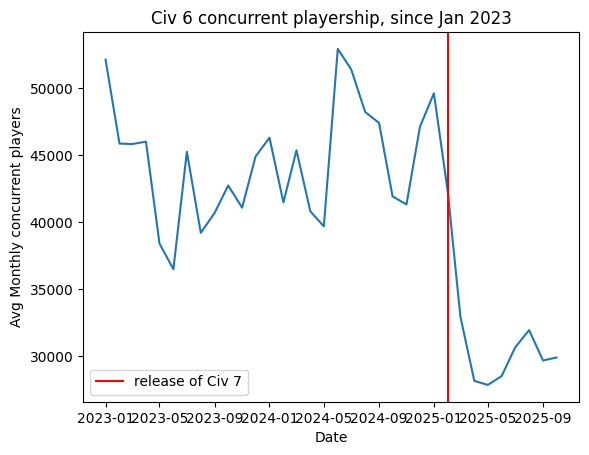

In [60]:
three_years_civ = Full_df[(Full_df['Year']>2022) & (Full_df['Game'] == "Civilization")]

plt.plot(three_years_civ['Date'],three_years_civ['Avg. Players'])

plt.axvline(x=pd.to_datetime('2025-02-01'),color = 'r', label = 'release of Civ 7')
plt.xlabel('Date')
plt.ylabel('Avg Monthly concurrent players')
plt.title('Civ 6 concurrent playership, since Jan 2023')
plt.legend()